In [21]:
import pandas as pd

In [259]:
#one is infectious for 7 days, which also gives us how many infected people recover in a day
tr=1/7
#how many people one infects every day
ti=3/7
#how much of the recovered become susceptible again
ta=1/90
#ratio of people following lockdown
tl=0.8
#duration of lockdown
td=50
#ratio of people getting vaccine and immuned
tv=0.2

In [224]:
def update_func_simple(t, state, system):
    """
    This is a simple update function that doesn't yet consider lockdown or re-contracting.
    The update function is meant to transform each population state to the state of the next day.
    """
    s, i, r = state.s, state.i, state.r
    infected = state.i*state.s*system.ti
    recovered = state.i*system.tr
    
    s -= infected
    i += infected-recovered
    r += recovered
    
    return state

In [260]:
#initialize our state
init_state=pd.DataFrame(columns=['s', 'i', 'r'])
init_state.loc[0]=[0.9999, 0.0001, 0]
init_state.index.name='Day'
print(init_state)
#create a system that include the state
system=pd.DataFrame(columns=['state', 'tr', 'ti', 'ta', 'tl', 'td', 'tv'])
system.loc[0]=[init_state, tr, ti, ta, tl, td, tv]

          s       i    r
Day                     
0    0.9999  0.0001  0.0


In [247]:
def run_simulation(system, state, update_func, t_end):
    """
    Here's a function that run the simulation by making a new data frame that records time evolution of the population state.
    """
    #copy the initial state for update iteration so we don't alter the init_state
    copy=pd.DataFrame(columns=['s', 'i', 'r'])
    copy.loc[0]=[state.at[0, 's'],state.at[0, 'i'],state.at[0, 'r']]
    
    #create a separate data frame to record the progression
    frame=pd.DataFrame(columns=['s', 'i', 'r'])
    
    #loop the update
    for t in range(0, t_end):
        frame.loc[t]=copy.loc[0]
        update_func(t, copy, system)
        
    return frame

<Axes: >

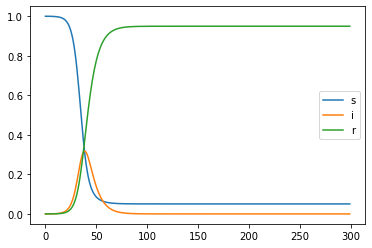

In [248]:
simple_results=run_simulation(system, init_state, update_func_simple, 300)
simple_results.plot()

In [249]:
print(simple_results)

            s             i         r
0    0.999900  1.000000e-04  0.000000
1    0.999857  1.285671e-04  0.000014
2    0.999802  1.652927e-04  0.000033
3    0.999731  2.125052e-04  0.000056
4    0.999640  2.731965e-04  0.000087
..        ...           ...       ...
295  0.050562  2.823583e-15  0.949438
296  0.050562  2.481400e-15  0.949438
297  0.050562  2.180686e-15  0.949438
298  0.050562  1.916414e-15  0.949438
299  0.050562  1.684168e-15  0.949438

[300 rows x 3 columns]


In [254]:
def update_func_complex(t, state, system):
    """
    During lockdown, people who follow it becomes immune. In other words, they are temporarily 'recovered.'
    People who receive vaccines are immune for around 90 days. We assume that means 1/90 of them become susceptible every day.
    """
    s, i, r= state.s, state.i, state.r

    if t<=td:
        infected = i*s*(1-system.tl)*(1-system.tv)*system.ti
        recovered = i*system.tr
        resusceptible=r*system.ta
    if t>td:
        infected = i*s*(1-system.tv)*system.ti
        recovered = i*system.tr
        resusceptible=r*system.ta
    
    s -= infected
    s += resusceptible
    i += infected-recovered
    r += recovered-resusceptible
    
    return state

<Axes: >

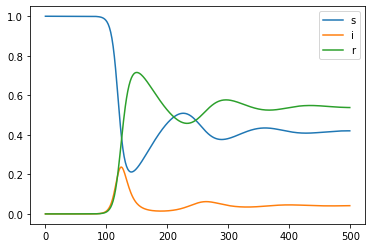

In [261]:
complex_results=run_simulation(system, init_state, update_func_complex, 500)
complex_results.plot()

In [262]:
print(complex_results)

            s         i         r
0    0.999900  0.000100  0.000000
1    0.999893  0.000093  0.000014
2    0.999887  0.000086  0.000027
3    0.999881  0.000079  0.000039
4    0.999876  0.000073  0.000050
..        ...       ...       ...
495  0.420257  0.041463  0.538280
496  0.420263  0.041514  0.538223
497  0.420262  0.041565  0.538173
498  0.420252  0.041617  0.538131
499  0.420235  0.041668  0.538097

[500 rows x 3 columns]
